<a href="https://colab.research.google.com/github/v-jhonattan/Transfer_Learning/blob/main/Transforma%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

In [13]:
def rgb_to_gray(img_rgb):
    # garante que está em uint8 0..255
    if img_rgb.dtype != np.uint8:
        img_rgb = (img_rgb * 255).astype(np.uint8)
    y = 0.299*img_rgb[...,0] + 0.587*img_rgb[...,1] + 0.114*img_rgb[...,2]
    return np.clip(np.rint(y), 0, 255).astype(np.uint8)

In [14]:
def otsu_threshold(gray):
    hist = np.bincount(gray.ravel(), minlength=256).astype(np.float64)
    total = gray.size
    w = np.cumsum(hist)
    m = np.cumsum(hist * np.arange(256))
    valid = (w > 0) & (w < total)
    mB = np.zeros(256); mF = np.zeros(256)
    mB[valid] = m[valid] / w[valid]
    mF[valid] = (m[-1] - m[valid]) / (total - w[valid])
    var = np.zeros(256); d = (mB - mF)
    var[valid] = w[valid] * (total - w[valid]) * d[valid]**2
    return int(np.argmax(var))

In [15]:
def binarize(gray, th):
    return np.where(gray < th, 0, 255).astype(np.uint8)

In [16]:
def transformar(img, threshold=None):
    gray = rgb_to_gray(img)
    th = otsu_threshold(gray) if threshold is None else int(threshold)
    bw = binarize(gray, th)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(img.astype(np.uint8)); ax[0].set_title("Colorida"); ax[0].axis("off")
    ax[1].imshow(gray, cmap="gray", vmin=0, vmax=255); ax[1].set_title("Cinza (0–255)"); ax[1].axis("off")
    ax[2].imshow(bw, cmap="gray", vmin=0, vmax=255); ax[2].set_title(f"P&B (th={th})"); ax[2].axis("off")
    plt.tight_layout(); plt.show()

    return gray, bw, th


Faça upload de uma imagem (PNG/JPG):


Saving IMG_0099.jpeg to IMG_0099.jpeg


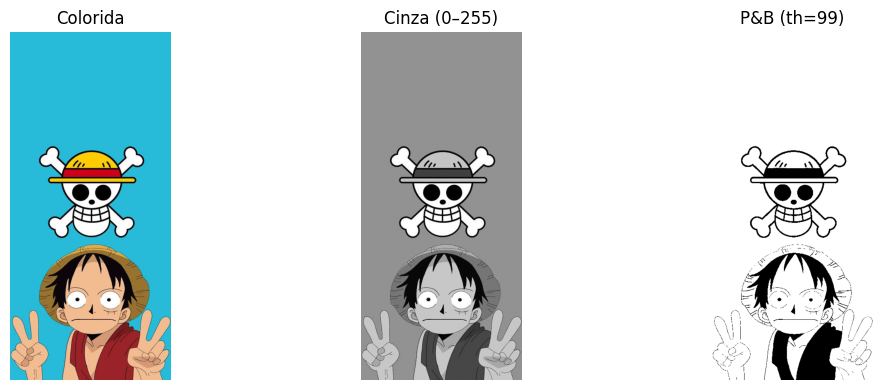

Limiar usado: 99


In [17]:
# --- upload e execução ---
print("Faça upload de uma imagem (PNG/JPG):")
up = files.upload()
fname = next(iter(up))
img = mpimg.imread(fname)

gray, bw, th = transformar(img, threshold=None)
print("Limiar usado:", th)